## Deskripsi Project

Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa akan lebih menghemat biaya jika perusahaan fokus untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.
Pada kasus ini, tugas kita adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. Kamu memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank.
Buat sebuah model dengan skor F1 semaksimal mungkin. Untuk bisa dinyatakan lulus dari peninjauan, kamu memerlukan skor F1 minimal 0,59 untuk test dataset.
Setelah itu, kamu akan membuat perubahan yang diperlukan pada pekerjaanmu dan mengirimkannya kembali untuk tinjauan kedua.
Selain itu, ukur metrik AUC-ROC dan bandingkan metrik tersebut dengan skor F1.

## Deskripsi Data

**Fitur-fitur**

- RowNumber — indeks string data
- CustomerId — ID pelanggan
- Surname — nama belakang
- CreditScore — skor kredit
- Geography — negara domisili
- Gender — gender
- Age — umur
- Tenure — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
- Balance — saldo rekening
- NumOfProducts — jumlah produk bank yang digunakan oleh nasabah
- HasCrCard — apakah nasabah memiliki kartu kredit (1 - jika ya; 0 - jika tidak)
- IsActiveMember — tingkat keaktifan nasabah (1 - jika ya; 0 - jika tidak)
- EstimatedSalary — estimasi gaji

- Exited — apakah nasabah telah berhenti (1 - jika ya; 0 - jika tidak)

## Tahapan



Ada beberapa tahapan yang akan dilakukan dalam proses pengujian kali ini, diantaranya:

- Tahap 1. Import Library
- Tahap 2. Import Data dan Checking Data
- Tahap 3. Preparing Data
- Tahap 4. Periksa Keseimbangan Data
- Tahap 5. Pemisahan Data
- Tahap 6. Pelatihan Model
- Tahap 7. Mengatasi Ketidakseimbangan Data
- Tahap 8. Pengujian Terakhir
- Tahap 9. Kesimpulan Umum


## Tahap.1 Import Library

Import library yang diperlukan

In [1]:
import pandas as pd

# model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# split data
from sklearn.model_selection import train_test_split

# cek akurasi
from sklearn.metrics import accuracy_score

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score 

## Tahap 2. Import Data dan Cheking Data

Data berada di data path berikut:

- /datasets/Churn.csv

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
data.shape

(10000, 14)

In [4]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [5]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [6]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [7]:
print(data.isna().sum())
print('Percent Missing Value pada kolom Tenure:')
print(data['Tenure'].isna().sum() / len(data) * 100)

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64
Percent Missing Value pada kolom Tenure:
9.09


In [8]:
print(data['Exited'].value_counts())
print(data['Exited'].value_counts() / data.shape[0] * 100)

0    7963
1    2037
Name: Exited, dtype: int64
0    79.63
1    20.37
Name: Exited, dtype: float64


**Kesimpulan**

Terdapat 14 kolom yang berbeda dan satu kolom sebagai target. Target yang digunakan adalah kolom `Exited`. Data yang ada ternyata terdapat missing value, missing value tersebut berada pada kolom `Tenure` dengan persentase missing value yaitu kurang lebih 9%. Untuk persentase yang ada pada kolom target memiliki nilai yang cukup besar perbedaannya atau dengan kata lain pada kolom target terdapat ketidak seimbangan data. Untuk nilai 0 (belum berhenti) berkisar hingga 79.6% sedangkan nilai 1 (telah berhenti) berkisar 20.4%.

Dari segi data yang ada, kemungkinan ada beberapa kolom yang tidak akan digunakan selama proses analisis. Kolom tersebut seperti `RowNumber`, `CustomerId`, `Surname` dsb.

## Tahap 3. Preparing Data

Dari hasil cheking data diatas, terdapat missing value yang berada pada kolom `Tenure` dengan persentase missing value kurang lebih 9%. Temuan lain adalah ada beberapa kolom yang kemungkinan tidak akan digunakan selama proses analisis ini. Untuk kolom yang tidak digunakan alangkah baiknya dihilangkan saja agar tidak menggagu proses analisis. Namun sebelum itu, mari atasi dulu missing value pada kolom `Tenure`.

In [9]:
print(data['Tenure'].describe())
print('__________________________')
print('Data yang sering muncul')
print(data['Tenure'].median())

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64
__________________________
Data yang sering muncul
5.0


Dari data yang ditampilkan diatas, mean pada kolom ini berada di 4.9, untuk median berada di 5.0 dan untuk nilai yang sering muncul berada di 1.0.

Untuk mengatasi missing value pada kolom ini, mari gunakan median dari kolom tersebut karena dilihat dari persentase missing value hanya 9% dan bila menggunakan nilai 5.0 atau nilai mediannya, sepertinya akan jauh lebih aman.

In [10]:
for col in ['Tenure']:
    data[col].fillna(data[col].median(), inplace=True)

In [11]:
print(data.isna().sum())
print('Percent Missing Value pada kolom Tenure:')
print(data['Tenure'].isna().sum() / len(data) * 100)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Percent Missing Value pada kolom Tenure:
0.0


Missing value pada kolom `Tenure` sudah berhasil diisi dengan median. Selanjutnya mari lakukan drop kolom-kolom yang mungkin tidak digunakan pada analisis ini.

In [12]:
data1 = data
data1 = data1.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [13]:
data1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
data1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Kolom yang kemungkinan tidak akang digunakan pada analisis ini sudah berhasil di drop. Pada kolom `Geography` dan kolom `Gender`, 2 kolom ini dapat diperjelas dengan menggunakan one hot endcoding agar memudahkan langkah selanjutnya.

In [15]:
# one hot endcoding pada kolom kategorikal
data_ohe = pd.get_dummies(data1, columns=['Geography', 'Gender'], drop_first=True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


data_ohe menyimpan data serta kolom kolom categorikal yang sudah di one hot endcoder.

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary']
scaler = StandardScaler()
data_ohe[numeric] = scaler.fit_transform(data_ohe[numeric])
data_ohe[numeric]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,-0.326221,0.293517,-1.086246,-1.225848,0.021886
1,-0.440036,0.198164,-1.448581,0.117350,0.216534
2,-1.536794,0.293517,1.087768,1.333053,0.240687
3,0.501521,0.007457,-1.448581,-1.225848,-0.108918
4,2.063884,0.388871,-1.086246,0.785728,-0.365276
...,...,...,...,...,...
9995,1.246488,0.007457,0.000761,-1.225848,-0.066419
9996,-1.391939,-0.373958,1.812439,-0.306379,0.027988
9997,0.604988,-0.278604,0.725432,-1.225848,-1.008643
9998,1.256835,0.293517,-0.723910,-0.022608,-0.125231


Pada data_ohe menyimpan data1 yang kolom kategorikal nya sudah di label kan dengan 0 dan 1. Langkah berikutnya mari periksa keseimbangan dari data yang ada tersebut. 

## Tahap 4. Periksa Keseimbangan kelas

Dari data yang ada, mari bandingkan keseimbangan kelas yang ada pada target. Kolom yang akan digunakan adalah kolom `Exited`.

In [17]:
class_distribution = data_ohe['Exited'].value_counts() / data.shape[0] * 100

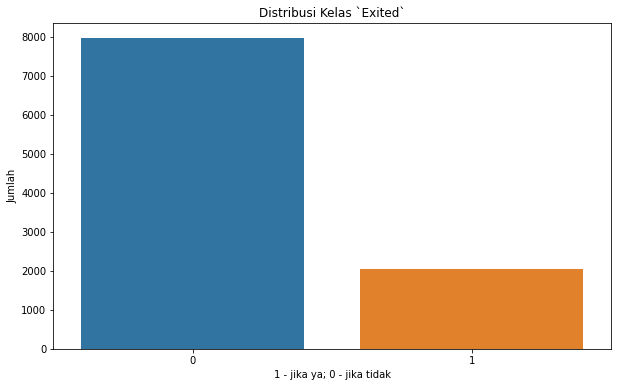

Persentase Kelas Distribusi `Exited`:
0    79.63
1    20.37
Name: Exited, dtype: float64


In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Exited', data=data_ohe)
plt.title('Distribusi Kelas `Exited`')
plt.xlabel('1 - jika ya; 0 - jika tidak')
plt.ylabel('Jumlah')
plt.show()
print('Persentase Kelas Distribusi `Exited`:')
print(class_distribution)

Dari data yang ditampilkan diatas, terlihat bahwa distribusi kelas pada kolom target memiliki ketidakseimbangan kelas. Persentase kelas 0 berada pada 79% dan kelas 1 berapa pada 20%. Ketidakseimbangan nya sangat jelas terlihat.

## Tahap 5. Pemisahan Data

Sebelum melakukan pemodelan dan memilih model mana yang paling baik, data yang ada akan dipisahkan terlebih dahulu ke dalam 3 bagian data yaitu:

- training set
- validation set
- test set

Dengan mengunakan train_test_split data dapat di pisahkan menjadi 3 bagian dengan porsi terbesar berada pada training set.

In [19]:
train_valid, test = train_test_split(data_ohe, test_size=0.1) 
train, valid = train_test_split(train_valid, test_size=0.1) 

train.shape, valid.shape, test.shape

((8100, 12), (900, 12), (1000, 12))

Data telah dipisahkan dengan kedalam 3 bagian yaitu train, valid, dan test. Dari ke 3 bagian data tersebut pisahkan fitur dan target. Sesuai dengan keterangan sebelumnya, kolom yang menjadi target adalah kolom `Exited`.

In [20]:
# training set, validation set, dan test set.

features_train = train.drop(['Exited'], axis=1)
target_train = train['Exited']

features_valid = valid.drop(['Exited'], axis=1)
target_valid = valid['Exited']

features_test = test.drop(['Exited'], axis=1)
target_test = test['Exited']

In [21]:
print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)
print(features_test.shape, target_test.shape)

(8100, 11) (8100,)
(900, 11) (900,)
(1000, 11) (1000,)


**Kesimpulan**

Ada beberapa catatan dari langkah yang telah dilakukan diatas, diantaranya:
1. - features_train menyimpan fitur untuk training set.
   - target_train menyimpan target untuk training set.
2. - features_valid menyimpan fitur untuk validation set.
   - target_valid menyimpan target untuk validation set.
3. - features_test menyimpan fitur untuk test set.
   - target_test menyimpan target untuk test set.

## Tahap 6. Pelatihan Model

Pada tahap ini pelatihan model akan menggunakan beberapa model agar dapat dibandingkan model mana yang memiliki nilai terbaik.
Model yang akan digunakan pada penelitian kali ini yaitu:

- Logistic Regression.
- Decision Tree Classifier.
- Random Forest Classifier.


Model pertama yang akan dibuat adalah model dengan menggunakan Logistic Regression.

In [22]:
# Model Logistic Regression
list_penalty = ['l1', 'l2']
for penalty in list_penalty:
    model_logreg = LogisticRegression(random_state=2023, penalty=penalty, solver='liblinear')
    model_logreg.fit(features_train, target_train)

    predicted_model = model_logreg.predict(features_valid)
    probabilities_valid = model_logreg.predict_proba(features_valid)[:, 1]

    print('Penalty:', penalty)
    print('F1:', f1_score(target_valid, predicted_model))
    print('ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('__________________________')

Penalty: l1
F1: 0.31851851851851853
ROC: 0.750827361938473
__________________________
Penalty: l2
F1: 0.31851851851851853
ROC: 0.7507482229704452
__________________________


Model diatas menggunakan Logistic Regression dan parameter yang diuji adalah penaltynya. Dari hasil diatas terlihat bahwa nilai F1 dan AUC-ROC tertinggi berada pada penalty l2. 

In [23]:
# Model Decision Tree Classifier
list_max_depth = [1,2,4,6,8]

for depth in list_max_depth:
    model_Dtree = DecisionTreeClassifier(random_state=2023, max_depth=depth)
    model_Dtree.fit(features_train, target_train)
    
    predicted_model = model_Dtree.predict(features_valid)
    probabilities_valid = model_Dtree.predict_proba(features_valid)[:, 1]

    print('max_depth:', depth)
    print('F1:', f1_score(target_valid, predicted_model))
    print('ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('______________________________')

max_depth: 1
F1: 0.0
ROC: 0.6721056721056722
______________________________
max_depth: 2
F1: 0.5194029850746269
ROC: 0.732233301677746
______________________________
max_depth: 4
F1: 0.5255972696245733
ROC: 0.8083973639529196
______________________________
max_depth: 6
F1: 0.5496688741721855
ROC: 0.8487114737114737
______________________________
max_depth: 8
F1: 0.5263157894736843
ROC: 0.825358283691617
______________________________


Model diatas menggunakan Desicion Tree dan parameter yang diuji adalah nilai dari max depth. Dari hasil diatas terlihat bahwa nilai F1 dan AUC-ROC tertinggi berada pada max depth 6.

In [24]:
# Model Random Forest Classifier
range_estimators = range(10, 101, 10)

for esti in range_estimators:
    model_Rforest = RandomForestClassifier(random_state=2023, n_estimators=esti)
    model_Rforest.fit(features_train, target_train)

    predicted_model = model_Rforest.predict(features_valid)
    probabilities_valid = model_Rforest.predict_proba(features_valid)[:, 1]

    print('n_estimators:', esti)
    print('F1:', f1_score(target_valid, predicted_model))
    print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('_____________________________')

n_estimators: 10
F1: 0.525974025974026
AUC-ROC: 0.8197142363809031
_____________________________
n_estimators: 20
F1: 0.5333333333333333
AUC-ROC: 0.8358693775360442
_____________________________
n_estimators: 30
F1: 0.5436893203883495
AUC-ROC: 0.8417436472992028
_____________________________
n_estimators: 40
F1: 0.5372168284789643
AUC-ROC: 0.841455869233647
_____________________________
n_estimators: 50
F1: 0.5311475409836066
AUC-ROC: 0.8424738841405508
_____________________________
n_estimators: 60
F1: 0.5245901639344261
AUC-ROC: 0.8428515928515927
_____________________________
n_estimators: 70
F1: 0.5407166123778501
AUC-ROC: 0.8438012604679272
_____________________________
n_estimators: 80
F1: 0.5214521452145214
AUC-ROC: 0.8463444991222769
_____________________________
n_estimators: 90
F1: 0.5377049180327869
AUC-ROC: 0.8452509424731648
_____________________________
n_estimators: 100
F1: 0.5394736842105263
AUC-ROC: 0.8448876226654004
_____________________________


Model diatas menggunakan Random Forest dan parameter yang diuji adalah nilai estimators nya. Dari hasil diatas terlihat bahwa nilai F1 dan AUC-ROC tertinggi berada pada estimators 90.

## Tahap 7. Mengatasi Keseimbangan Kelas

### Upsampling

Mengatasi keseimbangan data yang pertama yaitu menggunakan upsampling data. Untuk mempermudah langkah ini mari buat fungsi

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=2023
    )

    return features_upsampled, target_upsampled

In [26]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [27]:
target_train.value_counts()

0    6479
1    1621
Name: Exited, dtype: int64

In [28]:
target_upsampled.value_counts()

0    6479
1    4863
Name: Exited, dtype: int64

Proses upsampling sudah berhasil dan disimpan di features_upsampled dan target_upsampled. Langkah selanjutnya mari masukan data yang telah di upsampling ke model-model yang telah dilatih.

In [29]:
# Model Logistic Regression dengan data Upsampling
list_penalty = ['l1', 'l2']
for penalty in list_penalty:
    model_logreg = LogisticRegression(random_state=2023, penalty=penalty, solver='liblinear')
    model_logreg.fit(features_upsampled, target_upsampled)

    predicted_model = model_logreg.predict(features_valid)
    probabilities_valid = model_logreg.predict_proba(features_valid)[:, 1]

    print('Penalty:', penalty)
    print('F1:', f1_score(target_valid, predicted_model))
    print('ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('__________________________')

Penalty: l1
F1: 0.49130434782608695
ROC: 0.7523813634924745
__________________________
Penalty: l2
F1: 0.49130434782608695
ROC: 0.752366974589197
__________________________


In [30]:
# Model Decision Tree dengan data Upsampling
list_max_depth = [1,2,4,6,8]

for depth in list_max_depth:
    model_Dtree = DecisionTreeClassifier(random_state=2023, max_depth=depth)
    model_Dtree.fit(features_upsampled, target_upsampled)
    
    predicted_model = model_Dtree.predict(features_valid)
    probabilities_valid = model_Dtree.predict_proba(features_valid)[:, 1]

    print('max_depth:', depth)
    print('F1:', f1_score(target_valid, predicted_model))
    print('ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('______________________________')

max_depth: 1
F1: 0.47484909456740443
ROC: 0.6690624190624191
______________________________
max_depth: 2
F1: 0.5078125
ROC: 0.7292835765057988
______________________________
max_depth: 4
F1: 0.5333333333333333
ROC: 0.8023612190278857
______________________________
max_depth: 6
F1: 0.596
ROC: 0.8455459149903594
______________________________
max_depth: 8
F1: 0.6124401913875599
ROC: 0.833523986301764
______________________________


In [31]:
# Model Random Forest Classifier dengan data Upsampling
range_estimators = range(10, 101, 10)

for esti in range_estimators:
    model_Rforest = RandomForestClassifier(random_state=2023, n_estimators=esti)
    model_Rforest.fit(features_upsampled, target_upsampled)

    predicted_model = model_Rforest.predict(features_valid)
    probabilities_valid = model_Rforest.predict_proba(features_valid)[:, 1]

    print('n_estimators:', esti)
    print('F1:', f1_score(target_valid, predicted_model))
    print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('_____________________________')

n_estimators: 10
F1: 0.5705705705705707
AUC-ROC: 0.8003467725689948
_____________________________
n_estimators: 20
F1: 0.584070796460177
AUC-ROC: 0.823070448070448
_____________________________
n_estimators: 30
F1: 0.5763688760806917
AUC-ROC: 0.8333045555267777
_____________________________
n_estimators: 40
F1: 0.5971014492753622
AUC-ROC: 0.837225531669976
_____________________________
n_estimators: 50
F1: 0.5862068965517241
AUC-ROC: 0.8375312958646293
_____________________________
n_estimators: 60
F1: 0.5821325648414986
AUC-ROC: 0.8405457711013267
_____________________________
n_estimators: 70
F1: 0.5797101449275363
AUC-ROC: 0.842049411493856
_____________________________
n_estimators: 80
F1: 0.5830903790087464
AUC-ROC: 0.8435854269187603
_____________________________
n_estimators: 90
F1: 0.5872093023255813
AUC-ROC: 0.8435062879507326
_____________________________
n_estimators: 100
F1: 0.5936599423631125
AUC-ROC: 0.8462905407349852
_____________________________


**Kesimpulan**

Ada beberapa kesimpulan dari proses mengatasi ketidakseimbangan kelas dengan menggunakan metode upsampling ini, yaitu:
1. Upsampling menggunakan fitur dan target data.
2. Metode upsampling menggunakan 3 model yang dilatih, model tersebut adalah: Logistic Regression, Decision Tree Classifier, Random Forest Classifier.
3. Model dengan nilai F1 dan AUC-ROC terbaik adalah model Random Forest Classifier.
3. Model Random Forest Classifier menggunakan paramter n_estimators dari 10-100 dengan kelipatan 10. Hasil dari nilai F1 dan AUC-ROC adalah model dengan n_estimators 60.

### Downsampling

In [32]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=2023)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=2023)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=2023
    )

    return features_downsampled, target_downsampled

In [33]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [34]:
target_train.value_counts()

0    6479
1    1621
Name: Exited, dtype: int64

In [35]:
target_downsampled.value_counts()

0    1944
1    1621
Name: Exited, dtype: int64

Proses downsampling sudah berhasil dan disimpan di features_downsampled dan target_downsampled. Langkah selanjutnya mari masukan data yang telah di upsampling ke model-model yang telah dilatih.

In [36]:
# Model Logistic Regression dengan data Downsampling
list_penalty = ['l1', 'l2']
for penalty in list_penalty:
    model_logreg = LogisticRegression(random_state=2023, penalty=penalty, solver='liblinear')
    model_logreg.fit(features_downsampled, target_downsampled)

    predicted_model = model_logreg.predict(features_valid)
    probabilities_valid = model_logreg.predict_proba(features_valid)[:, 1]

    print('Penalty:', penalty)
    print('F1:', f1_score(target_valid, predicted_model))
    print('ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('__________________________')

Penalty: l1
F1: 0.496
ROC: 0.7513453624564735
__________________________
Penalty: l2
F1: 0.49900199600798406
ROC: 0.7511295289073068
__________________________


In [37]:
# Model Decision Tree dengan data Downsampling
list_max_depth = [1,2,4,6,8]

for depth in list_max_depth:
    model_Dtree = DecisionTreeClassifier(random_state=2023, max_depth=depth)
    model_Dtree.fit(features_downsampled, target_downsampled)
    
    predicted_model = model_Dtree.predict(features_valid)
    probabilities_valid = model_Dtree.predict_proba(features_valid)[:, 1]

    print('max_depth:', depth)
    print('F1:', f1_score(target_valid, predicted_model))
    print('ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('______________________________')

max_depth: 1
F1: 0.47484909456740443
ROC: 0.6690624190624191
______________________________
max_depth: 2
F1: 0.5078125
ROC: 0.7292835765057988
______________________________
max_depth: 4
F1: 0.5341130604288499
ROC: 0.8033828311606089
______________________________
max_depth: 6
F1: 0.5867768595041323
ROC: 0.8408119658119657
______________________________
max_depth: 8
F1: 0.5932584269662922
ROC: 0.8331750553972778
______________________________


In [38]:
# Model Random Forest Classifier dengan data Downsampling
range_estimators = range(10, 101, 10)

for esti in range_estimators:
    model_Rforest = RandomForestClassifier(random_state=2023, n_estimators=esti)
    model_Rforest.fit(features_downsampled, target_downsampled)

    predicted_model = model_Rforest.predict(features_valid)
    probabilities_valid = model_Rforest.predict_proba(features_valid)[:, 1]

    print('n_estimators:', esti)
    print('F1:', f1_score(target_valid, predicted_model))
    print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('_____________________________')

n_estimators: 10
F1: 0.6018099547511312
AUC-ROC: 0.8353585714696825
_____________________________
n_estimators: 20
F1: 0.6031042128603105
AUC-ROC: 0.8487294598405708
_____________________________
n_estimators: 30
F1: 0.6044444444444445
AUC-ROC: 0.8435926213703991
_____________________________
n_estimators: 40
F1: 0.6052631578947368
AUC-ROC: 0.8448408587297476
_____________________________
n_estimators: 50
F1: 0.6065934065934065
AUC-ROC: 0.8466430688652911
_____________________________
n_estimators: 60
F1: 0.6071428571428572
AUC-ROC: 0.8492654464876688
_____________________________
n_estimators: 70
F1: 0.6013363028953229
AUC-ROC: 0.8474308613197501
_____________________________
n_estimators: 80
F1: 0.6044444444444445
AUC-ROC: 0.8479632507410286
_____________________________
n_estimators: 90
F1: 0.5951859956236324
AUC-ROC: 0.84827980661314
_____________________________
n_estimators: 100
F1: 0.6008771929824561
AUC-ROC: 0.848031598031598
_____________________________


**Kesimpulan**

Ada beberapa kesimpulan dari proses mengatasi ketidakseimbangan kelas dengan menggunakan metode Downsampling ini, yaitu:

1. Downsampling menggunakan fitur dan target data.
2. Metode Downsampling menggunakan 3 model yang dilatih, model tersebut adalah: Logistic Regression, Decision Tree Classifier, Random Forest Classifier.
3. Model dengan nilai F1 dan AUC-ROC terbaik adalah model Random Forest Classifier.
4. Model Random Forest Classifier menggunakan paramter n_estimators dari 10-100 dengan kelipatan 10. Hasil dari nilai F1 dan AUC-ROC adalah model dengan n_estimators 90.

### Kesimpulan Mengatasi Keseimbangan Kelas

Ada beberapa kesimpulan untuk tahap ini, diantaranya:
1. Ada 2 metode yang digunakan untuk mengatasi ketidakseimbangan kelas pada data, yaitu Upsampling dan Downsampling.
2. Kedua metode yang dilakukan pengujian terhadap model memiliki nilia F1 dan AUC-ROC yang berbeda.
3. Dari kedua metode tersebut, didapat model yang terbaik yaitu model Random Forest Classifier.
4. Dari kedua metode yang ada, metode Upsampling adalah metode yang lebih baik dari Downsampling dari segi nilai F1 dan AUC-ROC. Upsampling dengan menggunakan model Random Forest Classifier memiliki nilai F1 dan AUC-ROC yang terbaik dari ketiga model yang dilatih. Dengan n_estimators yang di set di 60. 

## Tahap 8. Pengujian Terakhir

Dari hasil pengujian yang telah dilakukan, didapat bahwa metode untuk mengatasi ketidakseimbangan kelas adalh dengan menggunakan metode upsapling dan model terbaik yang memiliki nilai F1 dan AUC-ROC tertinggi adalah model Random Forest Classifier dengan n_estimators yang diset di 60. Mari lakukan pengujian terakhir dengan menggunakan test set dengan metode dan model terbaik sesuai hasil dari pengujian sebulumnya.

In [39]:
model_final = RandomForestClassifier(random_state=2023, n_estimators=60)
model_final.fit(features_upsampled, target_upsampled)

predicted_model = model_final.predict(features_valid)
probabilities_valid = model_final.predict_proba(features_valid)[:, 1]

print('n_estimators:', 60)
print('F1:', f1_score(target_valid, predicted_model))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid))
print('_____________________________')

n_estimators: 60
F1: 0.5821325648414986
AUC-ROC: 0.8405457711013267
_____________________________


In [40]:
predicted_model_test = model_final.predict(features_test)
probabilities_test = model_final.predict_proba(features_test)[:, 1]

print('n_estimators:', 60)
print('F1:', f1_score(target_test, predicted_model_test))
print('AUC-ROC:', roc_auc_score(target_test, probabilities_test))
print('_____________________________')

n_estimators: 60
F1: 0.6185567010309279
AUC-ROC: 0.8489699429831765
_____________________________


**Kesimpulan**

Dari hasil pengujian terakhir ini, didapat nilai F1 dan AUC-ROC pada model yang dilatih dengan Random Forest Classifier yang n_estimators nya diset 60 didapat nilai F1 yaitu 0.60 dan nilai AUC-ROC yaitu 0.83. Pengujian terakhir pun dilakukan pada test set yang menggunkan metode dan model yang sama. Didapat nilai F1 yaitu 0.596 dan nilai AUC_ROC yaitu 0.860. Nilia tersebut sudah melampaui nilai standar yang diberikan. Dapat dikatakan bahwa pengujian ini sudah berhasil dan nilai F1 dan AUC-ROC pun berhasil melampaui nilai standar tersebut.

## Tahap 9. Kesimpulan Umum

Ada beberapa kesimpulan dari pengujian yang telah dilakukan, berikut adalah kesimpulannya:
1. Data berada di data path berikut ini /datasets/Churn.csv. Data disimpan pada variable data.
2. Data yang dimiliki memiliki 10000 entries dan 14 kolom.
3. Dari 14 kolom tersebut 1 diantaranya adalah target yaitu kolom `Exited` dan sisanya adalah fitur.
4. Terdapat missing value pada kolom `Tenure`. Missing value diatasi dengan mengisi nilai media pada kolom ini karena nilai median terbilang lebih aman dan tidak akan terlalu mengganggu pada proses pengujian.
5. Kolom `Geography` dan `Gender` adalah kolom kategorikal, karena itu one hot encoder digunakan pada kolom ini agar dapat memudahkan proses pengujian.
6. Data yang ada ternyata memiliki ketidak seimbangan kelas, persentasenya pun cukup jauh 7. satu sama lain.
7. Data yang ada dibagi menjadi 3 bagian data, yaitu training set, validation set, dan test set.
8. Model yang digunakan pada penelitian kali ini ada 3 model, yaitu Logistic Regression, Decission Tree, dan juga Random Forest. Pada model Logistic Regression parameter yang digunakan adalah nilai dari penalty, untuk model Decission Tree parametr yang digunakan adalah nilai dari max depth, dan pada model Random Forest parameter yang digunakan adalah nilai dari n_estimators.
9. Proses untuk mengatasi ketidakseimbangan kelas pada pengujian kali ini menggunakan 2 metode yaitu Upsampling dan Downsampling.
10. 3 model dilatih pada 2 metode tersebut untuk mengatasi ketidakseimbangan kelas.
11. Dari hasil yang ada, didapat metode upsampling adalah metode terbaik untuk mengatasi ketidakseimbangan kelas. Untuk model terbaik adalah model dari Random Forest Classifier dengan n_estimators yang diset di 60.
12. Pengujian terakhir dilakukan menggunakan test set. Model dan metode terbaik digunakan pada pengujian terakhir ini.
12. Hasil dari pengujian terakhir didapat:
    - Model Random Forest Classifier dengan n_estimators 60 dilatih 
    - Metode upsampling digunakan untuk mengatasi ketidakseimbangan kelas.
    - Pada model yang dilatih nilai F1 yaitu 0.60 dan nilai AUC-ROC yaitu 0.83. 
    - Pada test set didapat nilai F1 yaitu 0.596 dan nilai AUC_ROC yaitu 0.860. 
13. Dari hasil yang didapat dari pengujian terakhir nilai tersebut sudah melampaui nilai standar yang diberikan. Dapat dikatakan bahwa pengujian ini sudah berhasil dan nilai F1 dan AUC-ROC pun berhasil melampaui nilai standar tersebut.